In [142]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:
def test_points(n_in, n_out):
    a = (np.random.rand(n_in)-.5)*10
    b = np.vstack((a, a*.5+np.random.randn(n_in)*.25))
    points = np.hstack((b, 2*np.random.randn(2, n_out)))
    return np.random.permutation(points.T).T

In [144]:
X = test_points(100,100)
X.shape

(2, 200)

In [145]:
def line_from_points(P, Q):
    rise = Q[1] - P[1]
    run = Q[0] - P[0]
    if run == 0:
        return None
    m = rise/run
    b = P[1] - m*P[0]
    return np.array([m,1,b])

In [146]:
coeff = line_from_points(X[:,0],X[:,1])
coeff

array([-0.40503678,  1.        ,  3.11475694])

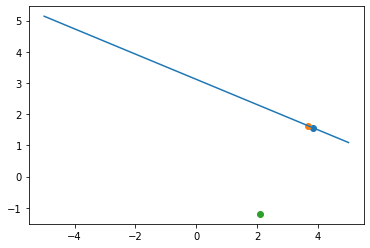

In [147]:
x = np.linspace(-5.0,5.0,1000)
# plt.scatter(X[0,:],X[1,:])
A,B,C = coeff
y = A*x + C
plt.figure(1)
plt.plot(x,y)
plt.scatter(X[:,0][0],X[:,0][1])
plt.scatter(X[:,1][0],X[:,1][1])
plt.scatter(2.1,-1.2)

In [148]:
def dist_to_line(coefficients,point):
    l = coefficients.reshape(-1,1)
    return abs(l.T @ point) / (point[2] * np.sqrt(l[0]**2 + l[1]**2))

In [149]:
lined = np.array([-A, B, -C])
dist_to_line(lined,np.array([2.1,-1.2,1]))

array([3.21080331])

In [150]:
def count_inliers(dataset,eps,line):
    inliers = 0
    if dataset.shape[0] == 2:
        dataset = np.append(X,np.ones((1,X.shape[1])),axis=0)
    for i in range(dataset.shape[1]):
        p = dataset[:,i]
        A,B,C = line
        line = np.array([-A, B, -C])
        d = dist_to_line(line,p)
        if d < eps:
            inliers += 1
    return inliers

In [151]:
count_inliers(X.copy(),.1,coeff.copy())

4

In [152]:
def random2p(X):
    return X[:,np.random.choice(range(X.shape[1]), 2)].copy()

In [167]:
def ransac(data, debug=False, eps=.5):
    max_in = 0
    best_line = None
    for _ in range(50):
        sample = random2p(data)
        coefficients = line_from_points(sample[:,1],sample[:,0])
        if coefficients is None:
            continue
        inliers = count_inliers(data,eps,coefficients.copy())
        if inliers > max_in:
            max_in = inliers
            best_line = coefficients
            if debug: print(best_line,inliers,sample)
    return best_line

([<matplotlib.lines.Line2D at 0x20a7a39f9a0>],
 array([ 0.43137959,  1.        , -0.05780227]))

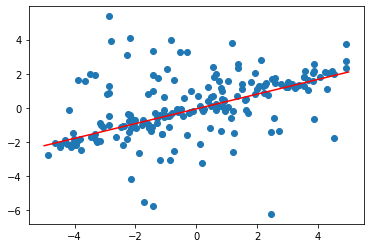

In [170]:
plt.figure(1)
plt.scatter(X[0,:],X[1,:])
lineline = ransac(X)
x = np.linspace(-5.0,5.0,100)
A,B,C = lineline
y = A*x + C
plt.plot(x,y,'r'), lineline

In [155]:
def pca_line(x): # assumes x is a (2 x n) array of points
    d = np.cov(x)[:, 0]
    d /= np.linalg.norm(d)
    l = [d[1], -d[0]]
    l.append(-(l@x.mean(1)))
    return l

In [157]:
pca_line(X),lineline

([0.3245838192020715, -0.9458569364931448, 0.11672176305895798],
 array([ 0.47323281,  1.        , -0.1377798 ]))